<a href="https://colab.research.google.com/github/ramprasadlg1/Data/blob/main/RandomForest_HyperparamterTuning_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

The random forest algorithm is a supervised machine learning algorithm that combines multiple decision trees to create a forest. It's used for classification and regression problems.

**It has a group of decision trees**
**Each decision tree in a forest is created randomly**




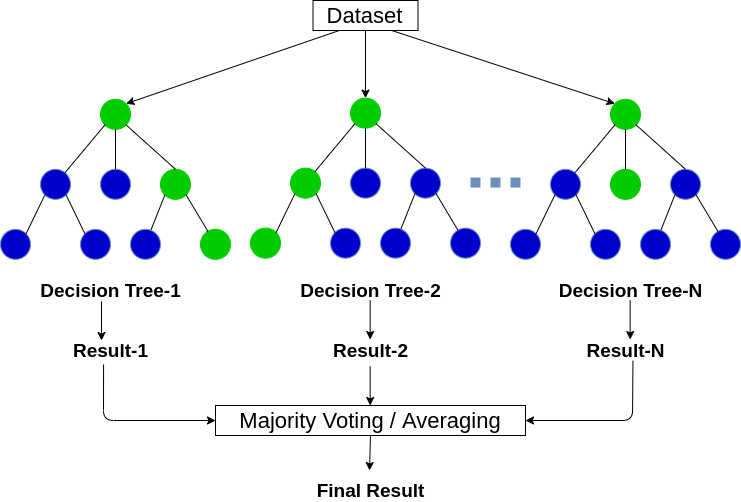

Each time selected from the population has a chance of being selected again even if it is already been selected before.


##BAGGING
B - Bootstrap (random sampling with replacement)
AGG - Aggregarion (combining the output)

The algorithm uses bagging and feature randomness to create an uncorrelated forest of trees. The prediction by committee of the forest is more accurate than that of any individual tree.

The algorithm relies on multiple decision trees and accepts the results of the predictions from each tree. It determines the final result based on the majority votes of predictions.

##Applications

The random forest algorithm is one of the most-used algorithms due to its simplicity and diversity.

Random Forest is used for both classification and regression. Random Forest is used across many different industries, including banking, retail, and healthcare, to name just a few!

It has immense potential in various applications, including movie recommendation systems, classifying whether an email is “spam” or “not spam.

Behavior identification in stock market
Estimation of loss and profit on buying perticular stock.





#Problem Statement

##Classification of Bank Customers.

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution.

Your money is invested for an agreed rate of interest over a fixed amount of time, or term

The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns.

Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

(The bank wants identify the customers who can opt for Term Deposits, so they they can target the eamil marketing, ads, telephone marketing, and digital marketing.
)


import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Data Acquisition and Description



In [2]:
data = pd.read_csv(filepath_or_buffer='https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%205%20ML2/bank_1_.csv')

In [3]:
data.shape

(11162, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


convert object datatype to numeric data type

In [7]:
#print(data['job'].value_counts())
#print(data['education'].value_counts())
#print(data['poutcome'].value_counts())

#data pre-processing
encoding catgorical data


Deposit, default,housing, and loan colums have either yes or no, so we can encode data

In [8]:
from re import M
dic={"yes":1, "no":0}
mylist = ["deposit", "loan", "default", "housing"]
for i in mylist:
  data[i]=data[i].map(dic)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


Conver the rest of the columns


In [10]:
#onehot encoding
data = pd.get_dummies(data, columns = ['job','marital','education','month','contact','poutcome'], drop_first=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   day                  11162 non-null  int64
 6   duration             11162 non-null  int64
 7   campaign             11162 non-null  int64
 8   pdays                11162 non-null  int64
 9   previous             11162 non-null  int64
 10  deposit              11162 non-null  int64
 11  job_blue-collar      11162 non-null  uint8
 12  job_entrepreneur     11162 non-null  uint8
 13  job_housemaid        11162 non-null  uint8
 14  job_management       11162 non-null  uint8
 15  job_retired          11162 non-null  uint8
 16  job_self-employed    1

In [12]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,1,0,0,0,0,1,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,1,0,0,0,0,1,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,1,0,0,0,0,1,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,1,0,0,0,0,1,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,1,0,0,0,0,1,0,0,1


Create the model
Initiating input and output data by droping unnecessary data features



In [13]:
X=data.drop(labels=['deposit'],axis=1)
y=data['deposit']

#Data Preperation
Split data into dependent and independent variable for futher development

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8929, 42)
(8929,)
(2233, 42)
(2233,)


##Baseline model development and evaluation
Develop random forest classifier using default setting


In [16]:
#instantiating a decision tree classifier
clf = RandomForestClassifier(n_estimators=150, max_depth=15)
clf.fit(X_train, y_train)

#predecting trainting and testing labels
y_train_pred_count1 = clf.predict(X_train)
y_test_pred_count1 = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred_count1)
accuracy_test = accuracy_score(y_test, y_test_pred_count1)

print (accuracy_train)
print (accuracy_test)


0.9512823384477546
0.8351992834751455


#Hyper Parameter Tuning


**Hyperparameter tuning allows data scientists to tweak model performance for optimal results. This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success. For example, assume you're using the learning rate of the model as a hyperparameter.**



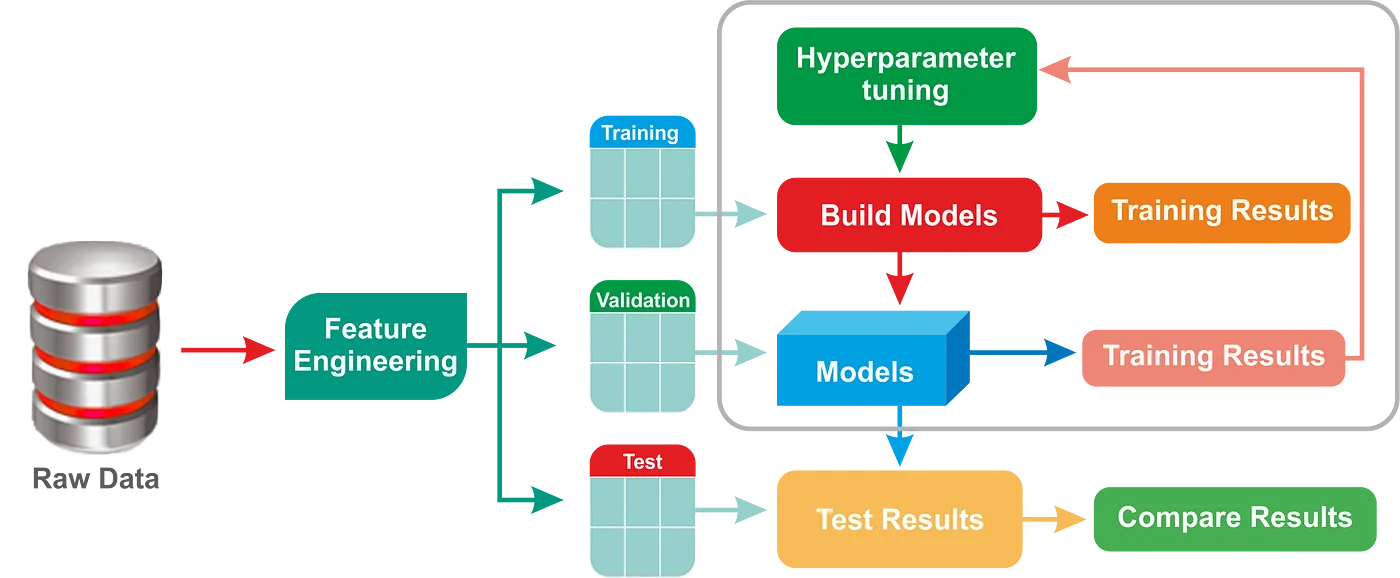

Image source: unknown

Define the parameter grid

In [17]:
# Define the parameter grid you want to search
param_grid = {
    'n_estimators': [100,200,300,350],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
}

##GridSearchCV


In [18]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1)

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Take a look at the best_params after GridSearchCV

In [20]:
best_params

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Evaluate the model

In [21]:
test_accuracy = best_model.score(X_test, y_test)
test_accuracy

0.8392297357814599

In [22]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a DataFrame to store results
results_df = pd.DataFrame({'Predicted_Label': y_pred})
results_df.head()

,Predicted_Label
0,1
1,1
2,1
3,1
4,0
